### Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!)

b) верхнетреугольная, ортогональная

c) нижнетреугольная, ортогональная

d) матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!



Найдите собственные значения и собственные вектора матрицы:

```
m = np.array([[2, 2],
              [1, 3]])
print(m)
```

In [ ]:
import numpy as np
import pandas as pd

*Диагональная, ортогональная, но не единичная(!)*

In [ ]:
A = np.array([[-1,0,0],[0,1,0],[0,0,1]]) # A(1,1) != 1 >>> A - не единичная
print(A)

# Проверка на ортигональность
AT = A.transpose()
print(A @ AT)

[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]


*Верхнетреугольная, ортогональная*

In [ ]:
A = np.array([[-1,0,0],[0,1,0],[0,0,1]]) # A(1,1) != 1 >>> A - не единичная
print(A)

# Проверка на ортигональность
AT = A.transpose()
print(A @ AT)

[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]


*Нижнетреугольная, ортогональная*

In [ ]:
A = np.array([[-1,0,0],[0,1,0],[0,0,1]]) # A(1,1) != 1 >>> A - не единичная
print(A)

# Проверка на ортигональность
AT = A.transpose()
print(A @ AT)

[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]


*Матрица, у которой определитель = 1, и все элементы не равны 0*

In [ ]:
B = np.array([[2,3],[1,2]])
np.linalg.det(B)

1.0

*Найдите собственные значения и собственные вектора матрицы:*

In [ ]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [ ]:
w, v = np.linalg.eig(m)

for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор [-0.70710678 -0.70710678]


### Уровень 1:

Найдите спектральное разложение матрицы:
```
m = np.array([[1, 2],
[2,3]])
print(m)
```



Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE. *

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации.

Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA
В качестве справки можно использовать:

(https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) - документация по PCA
(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) - документация по MSE
	
Картинки цифр можно взять отсюда - (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
)



In [ ]:
m = np.array([[1, 2],
              [2, 3]])
print(m)

[[1 2]
 [2 3]]


Классически

In [ ]:
eg = np.linalg.eig(m)
eg

(array([-0.23606798,  4.23606798]), array([[-0.85065081, -0.52573111],
        [ 0.52573111, -0.85065081]]))

In [ ]:
x = np.array(eg[1])
print(x)
y = np.diag(eg[0])
print(y)
z = np.linalg.inv(x)
print(z)
srm = x.dot(y).dot(z)
srm

[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]
[[-0.23606798  0.        ]
 [ 0.          4.23606798]]
[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]


array([[1., 2.],
       [2., 3.]])

In [ ]:
a, U = np.linalg.eig(m)

(U @ np.diag(a)) @ np.linalg.inv(U)

array([[1., 2.],
       [2., 3.]])

*Или через скалярное*

In [ ]:
a, U = np.linalg.eig(m)
print('Собственные значения:')
print(np.array(a, dtype=float))
print('\nСобственные вектора:')
print(U)

Собственные значения:
[-0.23606798  4.23606798]

Собственные вектора:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [ ]:
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

[[1. 2.]
 [2. 3.]]


In [ ]:
a, U = np.linalg.eig(m)

U @ np.diag(a) @ np.linalg.inv(U)
# Или
U @ np.diag(a) @ U.T

array([[1., 2.],
       [2., 3.]])

*Восстановления рукописных цифр (MNIST)*

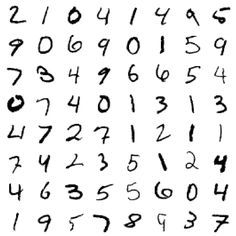

In [ ]:
from PIL import Image
img = Image.open("mnist.jpg")
arr = np.array(img.getdata())
img

In [ ]:
print(arr.size)
print(arr.size ** 0.5)


55696
236.0


In [ ]:
x = np.resize(arr, (236, 236))
x

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse

i = 1
res = []
while i <= 100:
  pca = PCA(n_components = i)
  reduced = pca.fit_transform(x)
  y = pca.inverse_transform(reduced)
  m = mse(x, y)
  res.append(m)
  i += 1

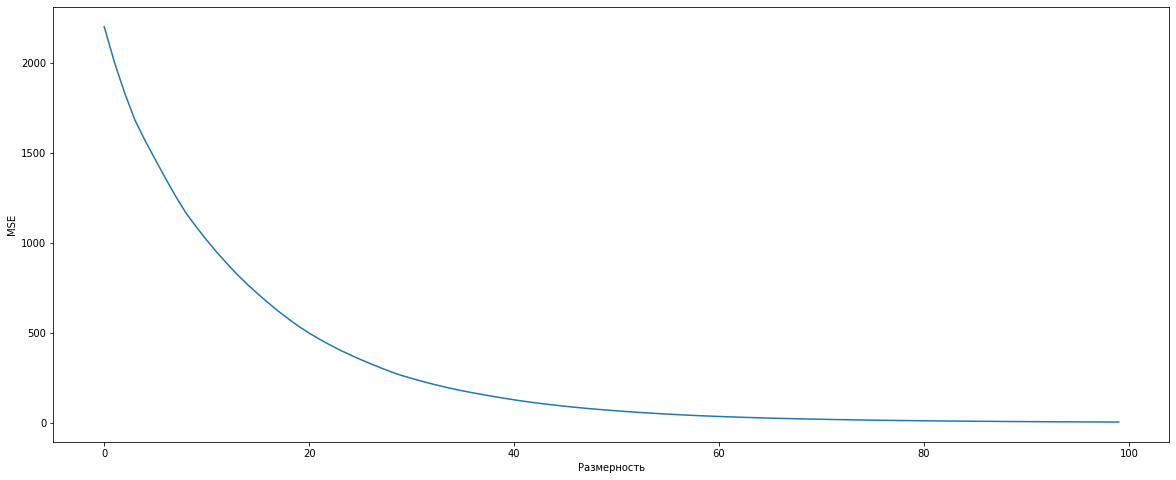

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(res)
plt.xlabel('Размерность')
plt.ylabel('MSE')
plt.show()

*Альтернативный вариант*

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

In [ ]:
digits = digits['data'].reshape(1797,8,8)

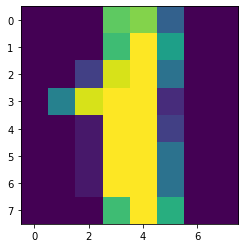

In [ ]:
plt.imshow(digits[1])

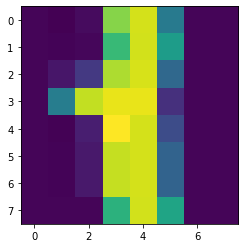

In [ ]:
X = digits[1]

pca = PCA(n_components=2)
pca.fit(X)
plt.imshow(pca.inverse_transform(pca.transform(X)))

In [ ]:
MSE(X, pca.inverse_transform(pca.transform(X)))

0.29382716424352084

In [ ]:
digits = load_digits()['data']
def get_mse(X, n_components):
  X = X.reshape((8,8))
  pca = PCA(n_components=n_components)
  pca.fit(X)
  return MSE(X, pca.inverse_transform(pca.transform(X)))

get_mse(digits[1], 3), get_mse(digits[1], 5)

(0.038943465847426625, 8.585795692078297e-31)

In [ ]:
score = []
components = []
for component in range(1, 9):
  score.append(np.apply_along_axis(get_mse, 1, digits, n_components=component).mean())
  components.append(component)

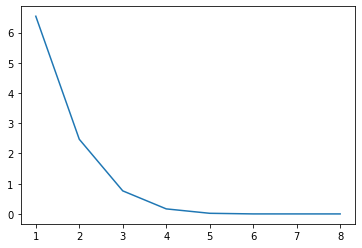

In [ ]:
plt.plot(components, score)

Наглядно

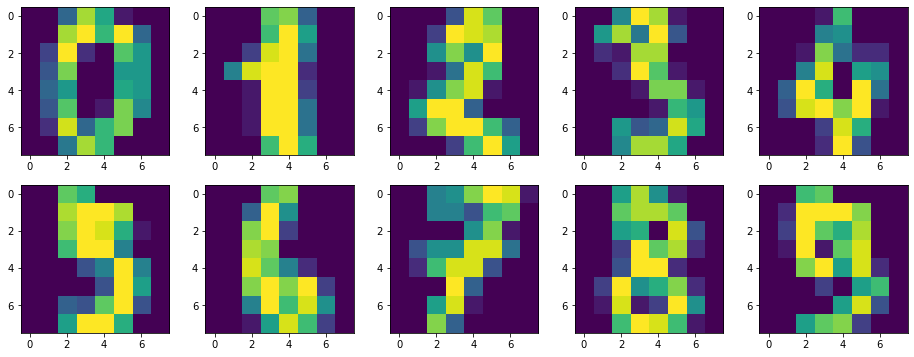

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics import mean_squared_error

digits = datasets.load_digits()
X = digits.data
# y = digits.target
# f, axes = plt.subplots(5, 2, sharey=True, figsize=(16,6))
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]))

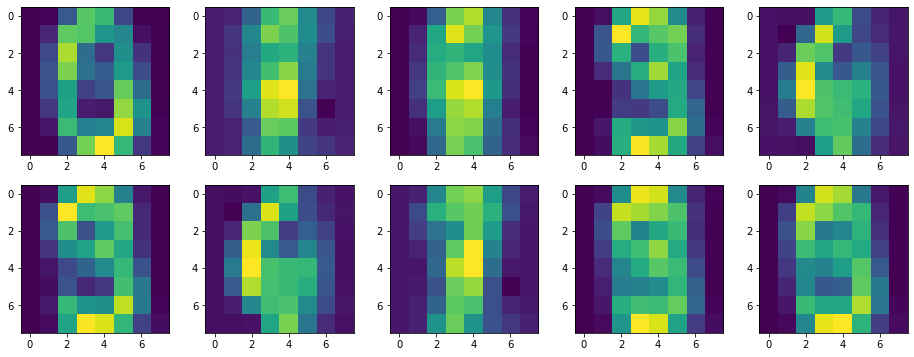

In [ ]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X1 = pca.inverse_transform(X_reduced)
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X1[i,:].reshape([8,8]))

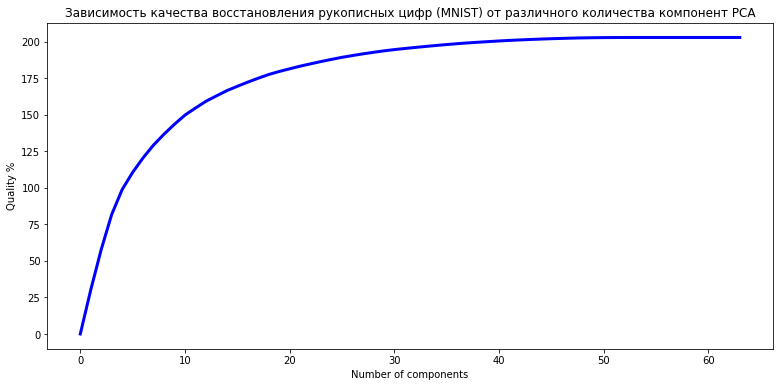

In [ ]:
def mse(n):
        pca = decomposition.PCA(n_components=n)
        X_reduced = pca.fit_transform(X)
        X1 = pca.inverse_transform(X_reduced)
        MSE = mean_squared_error(X, X1)
        return MSE

df = pd.DataFrame([mse(n) for n in range(64)])
df['quality'] = abs(((df[0]-df[0][0]))/(df[0][63]))/(10**27)
plt.figure(figsize=(13,6))
plt.plot(df['quality'], color='b', lw=3)
plt.title('Зависимость качества восстановления рукописных цифр (MNIST) от различного количества компонент PCA')
plt.xlabel('Number of components')
plt.ylabel('Quality %')
plt.show()

Просто и наглядно

<Figure size 432x288 with 0 Axes>

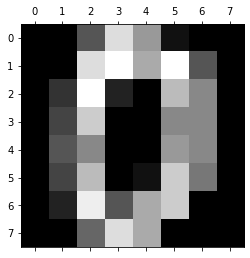

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

X, y = load_digits(return_X_y=True)
img = X[0]
img = img.reshape((8,8))

plt.gray() 
plt.matshow(img) 
plt.show()

In [ ]:
m = []
n = []

for i in range(1,64):
    m.append(i)
    
    pca = PCA(n_components=i)

    pca.fit(X)
    
    X2 = pca.transform(X)
    X3 = pca.inverse_transform(X2)
    
    k = mean_squared_error(X, X3)
    n.append(k)

Text(0, 0.5, 'MSE')

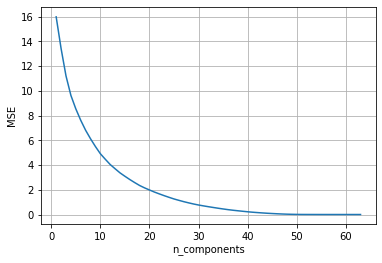

In [ ]:
plt.plot(m,n)
plt.grid(True)
plt.xlabel("n_components")
plt.ylabel("MSE")